# Bivariate Exploration of Data

**Bivariate visualizations**, means those visualizations involving two variables. The variation in one variable will affect the value of the other variable.

Types of Bivariate visualizations:

1. heat maps,
2. scatterplots,
3. violin plots,
4. box plots,
5. clustered bar charts,
6. faceting, and 
6. line plots

- Quantitative VS Quantitative variables: - *scatter plots*

- Quantitative VS Qualitative: *Violin plots*

- Qualitative VS Qualitative *clustered bar charts*

## Scatter plots and Correlation

A scatterplot is used to show the relationship between two quantitative variables. The two variables are indicated on X and Y-axis, respectively. Through the scatterplots, we can see clearly how these two variables correlate with each other.

To quantify how strong the correlation is between the variables, we use a correlation coefficient.

Pearson correlation coefficient (r) captures linear relationships. It is a value ranging from -1 to +1. A positive value of r indicates the increase in one variable tends to increase another variable. On the other hand, a negative r means the increase in one variable tends to cause a decrease in another variable. A value close to 0 indicates a weak correlation, and a value close to -1 and +1 indicates a strong correlation.

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [3]:
# import data
fuel_econ = pd.read_csv('../1. Data Files/fuel-econ.csv')

In [4]:
# data info
fuel_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   int64  
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  feScore    3929 non-null   int64  
 19  ghgScore   3929 non-null   int64  
dtypes: float

In [5]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


Scatter plot showing a negative correlation between two variables

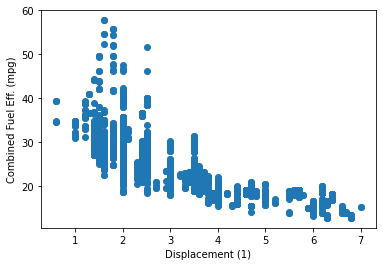

In [8]:
# Scatter plot
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (1)');
plt.ylabel('Combined Fuel Eff. (mpg)');

Seaborn's regplot() function combines scatterplot creation with regression function fitting:

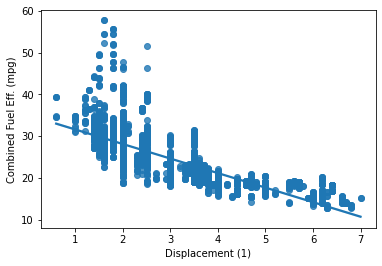

In [10]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (1)');
plt.ylabel('Combined Fuel Eff. (mpg)');

In the scatter plot above, by default, the regression function is linear and includes a shaded confidence region for the regression estimate. In this case, (that is, linear increases in the value of x are associated with linear increases in the log of y), plotting the regression line on the raw units is not appropriate. If we don't care about the regression line, then we could set fit_reg = False in the regplot function call.

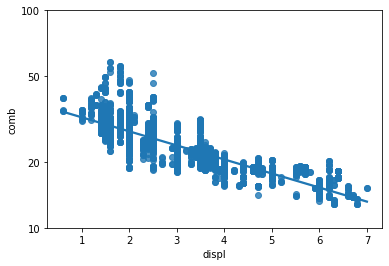

In [12]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(x=fuel_econ['displ'], y=fuel_econ['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

## Overplotting, Transparency and jitter

If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative. The visualization will suffer from overplotting, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.

- Overplotting - Where a plot is created with too many overlapping points.

Ways to resolve overploting

1. Sampling - taking a sample, reducing number of points to plot
2. Transparency - plot all the points, Each individual point will be lighter in color, but when points overlap, the overlapped region becomes darker. 
3. Jitter - if one or both varaibles are discrete, we use jitter. Jittering adds a small amount of random noise to the position of each point. 

Jitter is not a direct option in matplotlib's scatter() function, but is a built-in option with seaborn's regplot() function. The x- and y- jitter can be added independently, and won't affect the fit of any regression function if made.

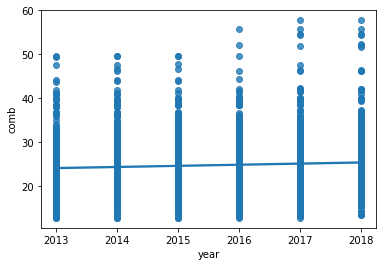

In [14]:
sb.regplot(data=fuel_econ, x='year', y = 'comb');

the regression line shows a slight improvement on the fuel efficiency but this is not clear from the data. The only points we can pick out are those above 42mpg. 

jitter the x axis

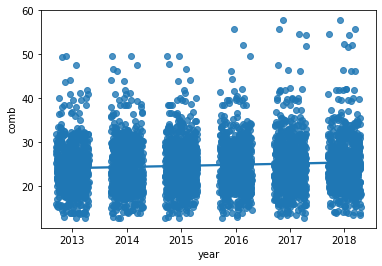

In [20]:
# use jitter. Each value of x wil be adjusted randomly upto 0.3 more or 0.3 less.
sb.regplot(data=fuel_econ, x='year', y = 'comb', x_jitter = 0.3);

Set the transparency

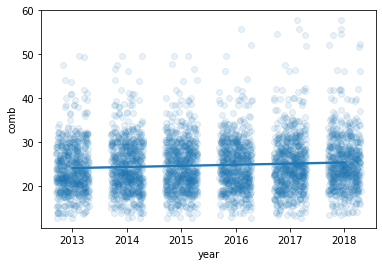

In [23]:
sb.regplot(data=fuel_econ, x='year', y = 'comb', x_jitter = 0.3, scatter_kws = {'alpha' : 0.1});

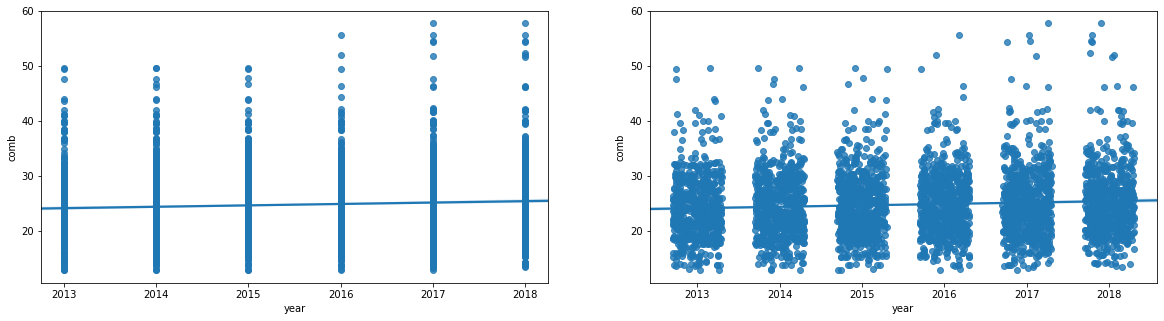

In [24]:
##########################################
# Resize figure to accommodate two plots
plt.figure(figsize = [20, 5])

# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False);

##########################################
# PLOT ON RIGHT - SCATTER PLOT WITH JITTER
plt.subplot(1, 2, 2)

# In the sb.regplot() function below, the `truncate` argument accepts a boolean.
# If truncate=True, the regression line is bounded by the data limits. 
# Else if truncate=False, it extends to the x axis limits.
# The x_jitter will make each x value will be adjusted randomly by +/-0.3
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3);

The scatter plot on left showing a simple scatter plot, while the right one presents with jitter.

In the left scatter plot above, the degree of variability in the data and strength of the relationship is fairly unclear. In cases like this, we may want to employ transparency and jitter to make the scatterplot more informative. The right scatter plot has a jitter introduced to the data points.

You can add transparency to either scatter() or regplot() by adding the "alpha" parameter set to a value between 0 (fully transparent, not visible) and 1 (fully opaque). 